In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from morpheus.classifier import Classifier
from morpheus.data import example
%matplotlib inline
import pickle
from astropy.visualization import ZScaleInterval

2023-02-23 08:48:57.785920: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 08:48:57.785979: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-23 08:49:04.450288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-23 08:49:04.457560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-23 08:49:04.457595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

# Getting Data H,J,V,z

F160W (H) / F125W (J) / F606W (V) / F850LP (z)

In [14]:
from astropy.io import fits
f115w_nircam_i2d = ('/data/jip/2023-02-06/img/align-image/jw01345-o002_t022_nircam_clear_f115w_aligned.fits')
f150w_nircam_i2d = ('/data/jip/2023-02-06/img/align-image/jw01345-o002_t022_nircam_clear_f150w_aligned.fits')
f200w_nircam_i2d = ('/data/jip/2023-02-06/img/align-image/jw01345-o002_t022_nircam_clear_f200w_aligned.fits')

h, j, v, z = f115w_nircam_i2d, f150w_nircam_i2d, f200w_nircam_i2d, f200w_nircam_i2d

# fits 특성에 따라서 ext 바꿔줘야 
hdat = fits.getdata(h, ext=1)
jdat = fits.getdata(j, ext=1)
vdat = fits.getdata(v, ext=1)
zdat = fits.getdata(z, ext=1)

h_header = fits.getheader(h, ext=1)
j_header = fits.getheader(j, ext=1)
v_header = fits.getheader(v, ext=1)
z_header = fits.getheader(z, ext=1)

# Raw Image Show

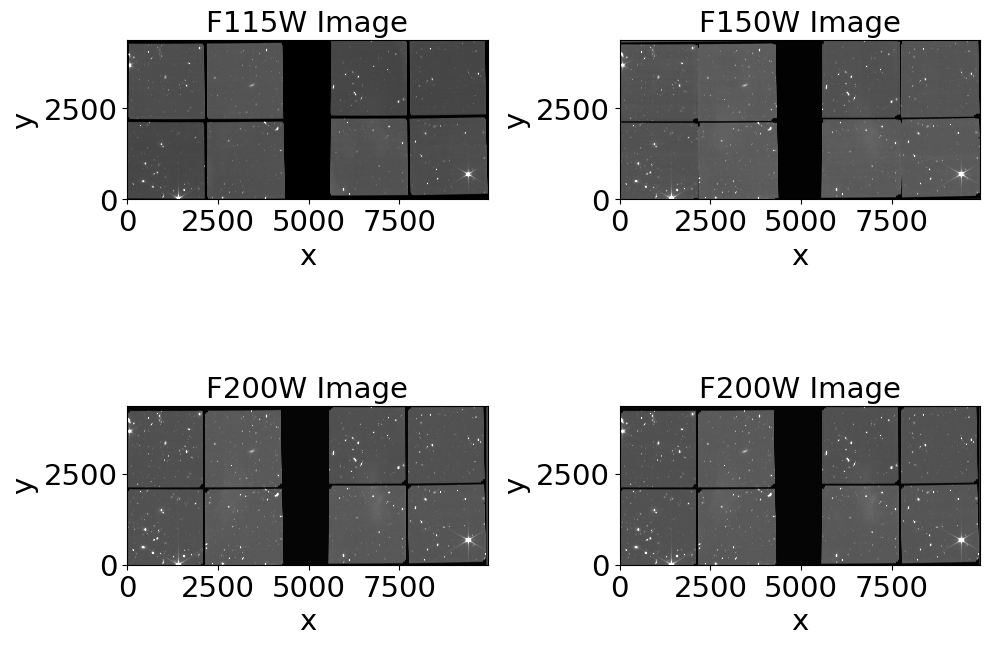

In [15]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hdat, jdat, vdat, zdat], ['F115W', 'F150W', 'F200W', 'F200W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ZInterval = ZScaleInterval()
    vmin, vmax = ZInterval.get_limits(arr)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=vmin, vmax=vmax)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)
    plt.tight_layout()

# Image Cut and Show 

## 1) Given X Y ==> Cut the image


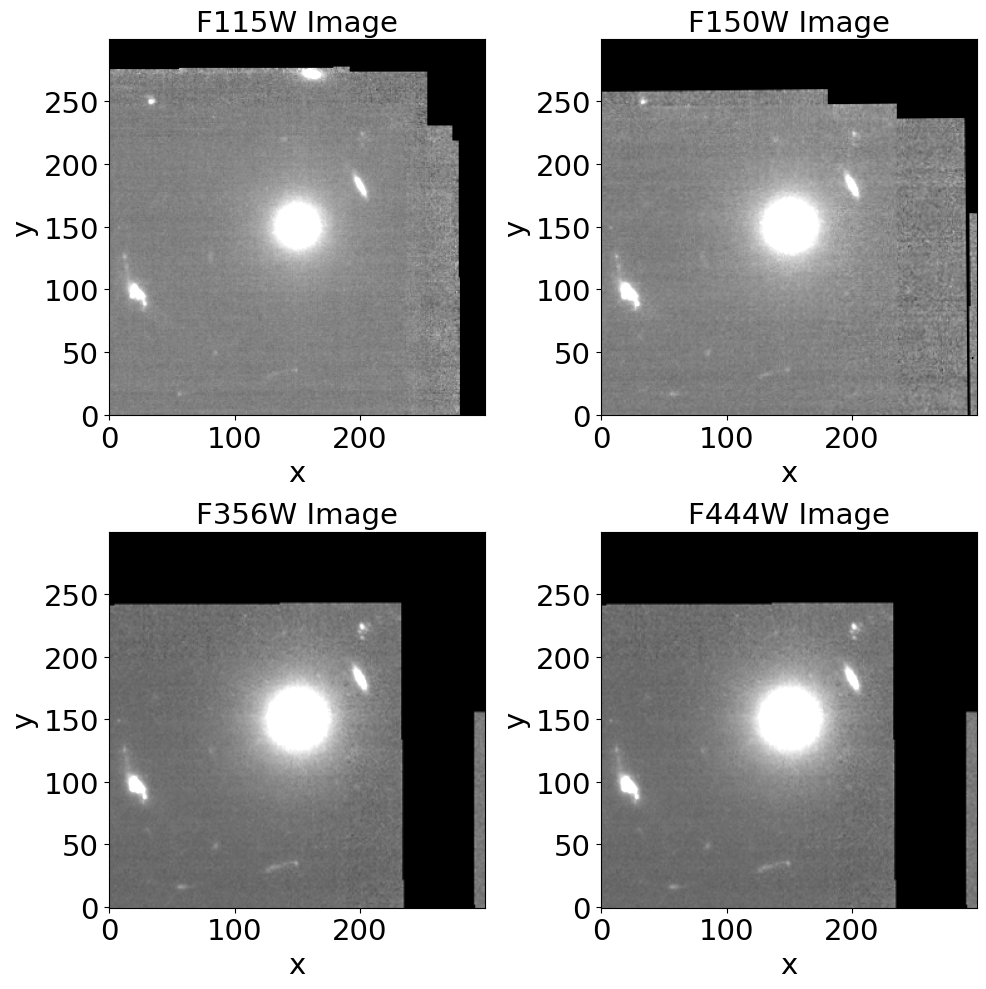

In [16]:
from astropy.nddata import Cutout2D
from astropy import units as u
cutoutposition = (1996, 4137)
cutoutsize = (300, 300)
hcut = Cutout2D(hdat, cutoutposition, cutoutsize).data
jcut = Cutout2D(jdat, cutoutposition, cutoutsize).data
vcut = Cutout2D(vdat, cutoutposition, cutoutsize).data
zcut = Cutout2D(zdat, cutoutposition, cutoutsize).data
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()

for ax, arr, band in zip(axes, [hcut,jcut,vcut,zcut], ['F115W', 'F150W', 'F356W', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=0, vmax=0.3853037)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()


## 2) Given RA/DEC ==> Cut the image

Set DATE-AVG to '2022-06-21T23:30:42.583' from MJD-AVG.
Set DATE-END to '2022-06-22T00:03:43.515' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.785729 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725461621.089 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T00:41:54.035' from MJD-AVG.
Set DATE-END to '2022-06-22T01:14:35.286' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.795264 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725510974.395 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T01:53:47.550' from MJD-AVG.
Set DATE-END to '2022-06-22T02:27:14.386' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.800090 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725535860.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T02:59:46.731' from MJD-AVG.
Set DATE-END to '2022-06-22T03:26:17.615' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.812393 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725599046.468 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


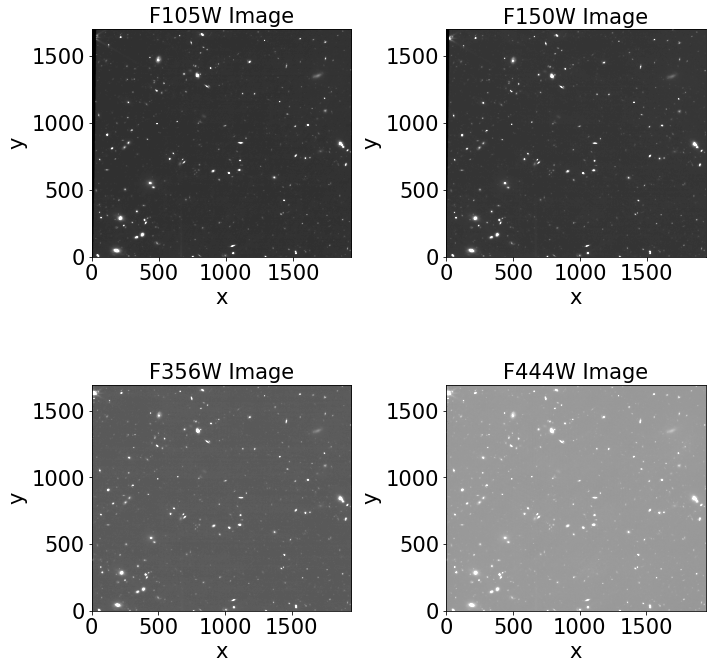

In [ ]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

wcs_h = WCS(h_header)
wcs_j = WCS(j_header)
wcs_v = WCS(v_header)
wcs_z = WCS(z_header)

cutoutposition_radec = [[14, 19, 28], [52, 53, 42]] #RA(hour, min, sec), DEC(deg, min, sec)형식
squarecutpoint_radec =  [[14, 19, 19.023], [52, 53, 41.14]] #RA(hour, min, sec), DEC(deg, min, sec)형식

def skycoord(x):
    ra = (x[0][0]+x[0][1]/60+x[0][2]/3600)*15*u.deg
    dec = (x[1][0]+x[1][1]/60+x[1][2]/3600)*u.deg
    c = SkyCoord(ra, dec)
    #print(c)
    return c

def cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs):
    cutoutposition = np.array(skycoord_to_pixel(skycoord(cutoutposition_radec), wcs))
    squarecutpoint = np.array(skycoord_to_pixel(skycoord(squarecutpoint_radec), wcs))
    #print(cutoutposition)
    #print(squarecutpoint)
    cutoutsize = abs(squarecutpoint-cutoutposition) * 2
    #print(cutoutsize)
    return np.array([cutoutposition, cutoutsize])
    
hcut = Cutout2D(hdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_h)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_h)[1]).data
jcut = Cutout2D(jdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_j)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_j)[1]).data
vcut = Cutout2D(vdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_v)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_v)[1]).data
zcut = Cutout2D(zdat, cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_z)[0], cutoutreturn(cutoutposition_radec, squarecutpoint_radec, wcs=wcs_z)[1]).data
#jcut = Cutout2D(jdat, cutoutposition, cutoutsize).data
#vcut = Cutout2D(vdat, cutoutposition, cutoutsize).data
#zcut = Cutout2D(zdat, cutoutposition, cutoutsize).data

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut,jcut,vcut,zcut], ['F105W', 'F150W', 'F356W', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=-0, vmax=0.38530371)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()

### image resizing for Morpheus (same size로) --> 추후 반드시 해결할 것 PIL VS cv2 

In [68]:
from PIL import Image
import cv2 

hcut_resize = cv2.resize(hcut, dsize=np.shape(hcut), interpolation=cv2.INTER_NEAREST)
jcut_resize = cv2.resize(jcut, dsize=(np.shape(hcut)))
vcut_resize = cv2.resize(vcut, dsize=(np.shape(hcut)))
zcut_resize = cv2.resize(zcut, dsize=(np.shape(hcut)))



/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:479: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:480: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/jip/anaconda3/lib/python3.9/site-packages/matplotlib/image.py:505: RuntimeWarning: overflow encountered in add
  A_resampled += a_min


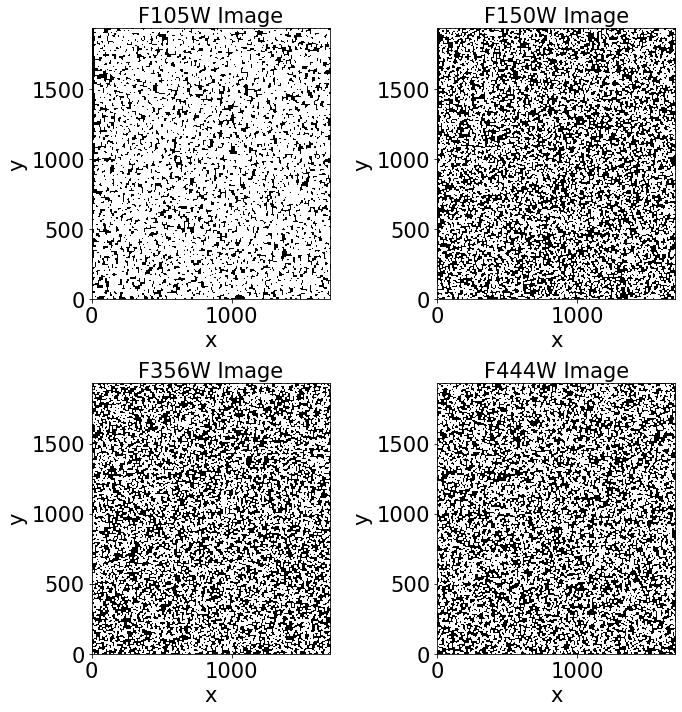

In [67]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut_resize,jcut_resize,vcut_resize,zcut_resize], ['F105W', 'F150W', 'F356W', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray')#,  vmin=0, vmax=0.38530371)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()

# Running Morpheus

In [17]:
# if image is already cutout image launch this cell making cut to dat 
# hcut, jcut, vcut, zcut = hdat, jdat, vdat, zdat

In [18]:
classified = Classifier.classify(h=hcut, j=jcut, v=vcut, z=zcut)

# the mask tells the segmentation mapping algorithm to ignore
# the areas unclassified as a result of the windowing classification
# method used.
mask = np.zeros_like(hcut, np.int)
mask[5:-5, 5:-5] = 1
segmap = Classifier.segmap_from_classified(classified, hcut, mask=mask)

catalog = Classifier.catalog_from_classified(classified, hcut, segmap)

rgb = Classifier.colorize_classified(classified)


classifying: 69batch [05:14,  4.56s/batch]                     
/tmp/ipykernel_26192/605678207.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(hcut, np.int)


Building Markers...
Watershedding...


Deblending: 100%|██████████| 8/8 [00:00<00:00, 169.79it/s]
/home/jip/Downloads/yes/lib/python3.9/site-packages/morpheus/classifier.py:1171: RuntimeWarning: invalid value encountered in true_divide
  return (classifications / classifications.sum()).tolist()
100%|██████████| 300/300 [00:00<00:00, 2141.26it/s]


# Saving Morpheus Classified Result to Pickle

Once calculation is done to here, don't need to calculate again.

In [53]:
# save with it 
with open("classified_result_ellipse2.pickle","wb") as f:
    pickle.dump(classified, f)

In [54]:
# load with it
with open("classified_result_ellipse2.pickle","rb") as fi:
    classified = pickle.load(fi)

# Colorizing Result

100%|██████████| 300/300 [00:00<00:00, 1746.64it/s]


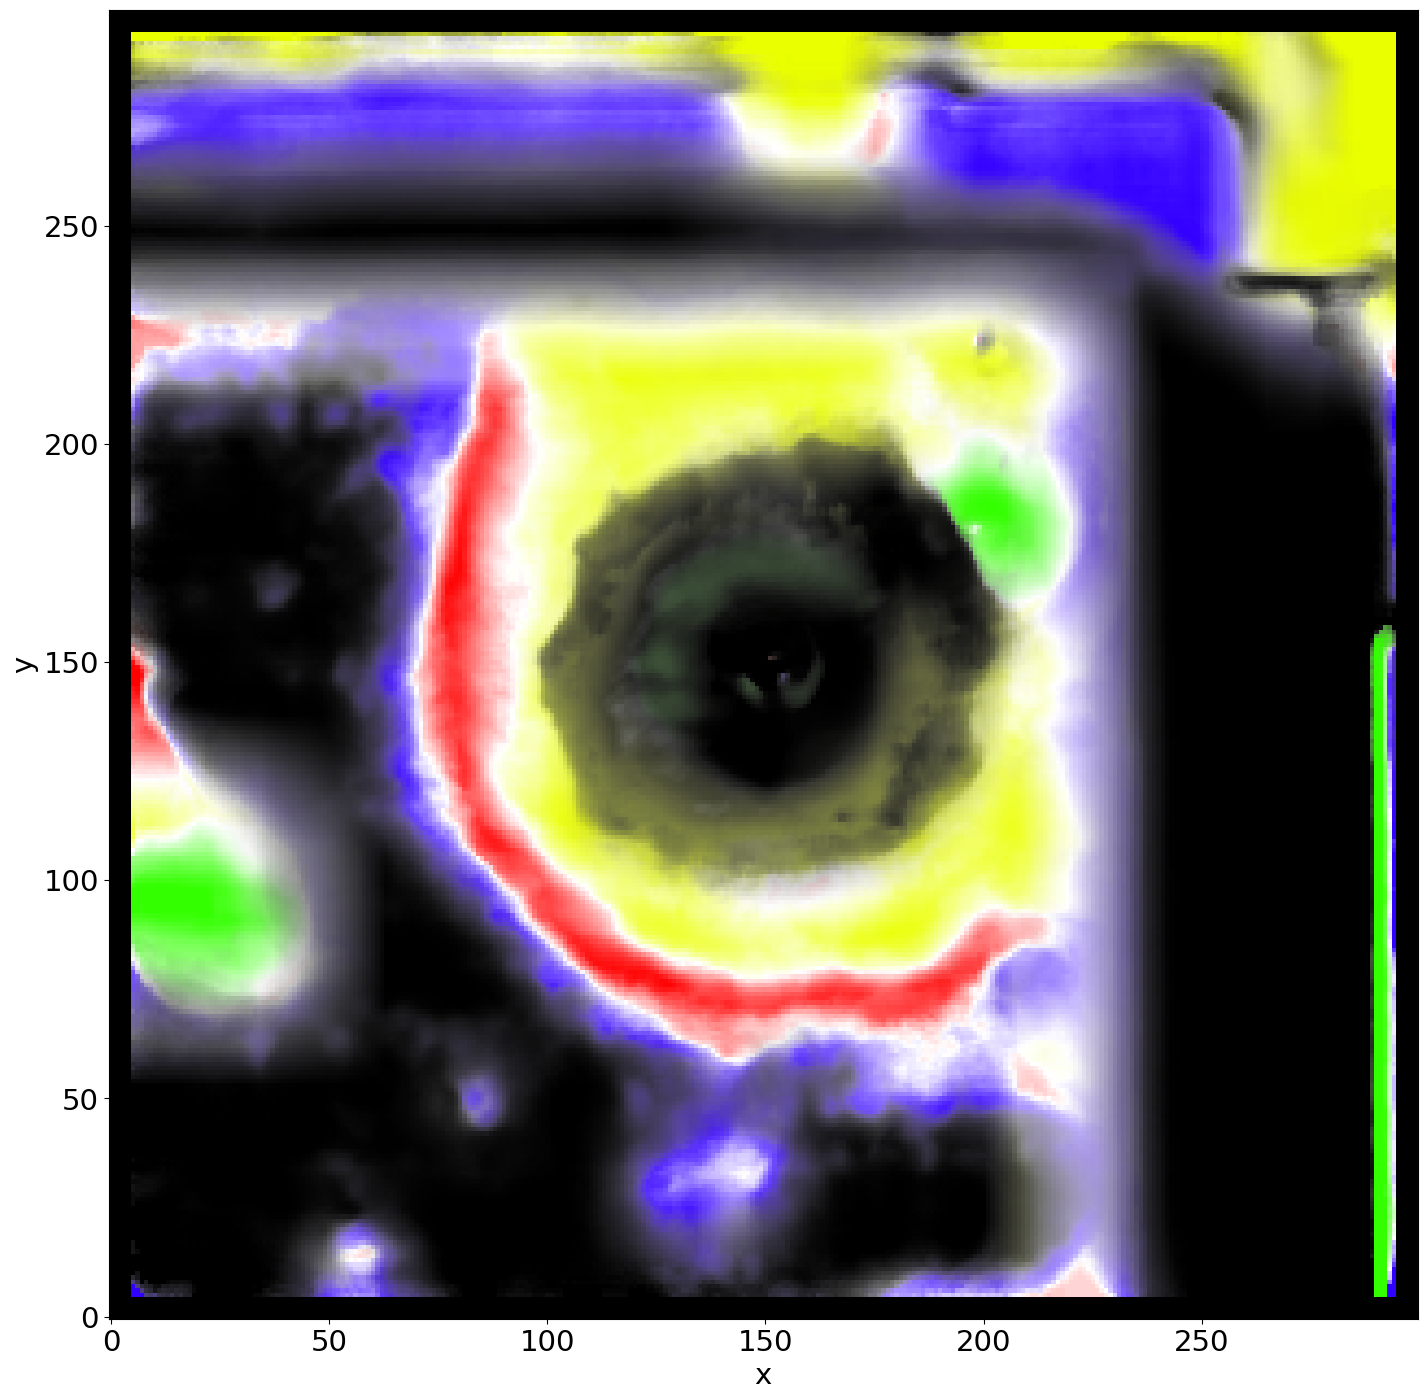

In [19]:
rgb = Classifier.colorize_classified(classified)

plt.figure(figsize=(17, 17))
plt.xlabel('x', fontsize=21)
plt.ylabel('y', fontsize=21)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.imshow(rgb, origin='lower')
plt.show()

# Saving Result to Dataframe, CSV

In [20]:
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs import WCS

wcs = WCS(h_header)

morpheus_result = pd.DataFrame(catalog)
morpheus_result['ra'] = pd.Series(dtype='float')
morpheus_result['dec'] = pd.Series(dtype='float')
morpheus_result['x'] = pd.Series(dtype='float')
morpheus_result['y'] = pd.Series(dtype='float')
morpheus_result['p_sph'] = pd.Series(dtype='float')
morpheus_result['p_disk'] = pd.Series(dtype='float')
morpheus_result['p_irr'] = pd.Series(dtype='float')
morpheus_result['p_ps'] = pd.Series(dtype='float')

for i in range(np.size(morpheus_result['ra'])):
    morpheus_result['x'][i] = morpheus_result['location'][i][1]
    morpheus_result['y'][i] = morpheus_result['location'][i][0]
    morpheus_result['p_sph'][i] = morpheus_result['morphology'][i][0]
    morpheus_result['p_disk'][i] = morpheus_result['morphology'][i][1]
    morpheus_result['p_irr'][i] = morpheus_result['morphology'][i][2]
    morpheus_result['p_ps'][i] = morpheus_result['morphology'][i][3]
   
morpheus_result['real_x'] = morpheus_result['x']+(cutoutposition[0]-cutoutsize[0]/2)
morpheus_result['real_y'] = morpheus_result['y']+(cutoutposition[1]-cutoutsize[1]/2)

for i in range(np.size(morpheus_result['ra'])):
    morpheus_result['ra'][i] = pixel_to_skycoord(morpheus_result['real_x'][i], morpheus_result['real_y'][i], wcs).ra.degree
    morpheus_result['dec'][i] = pixel_to_skycoord(morpheus_result['real_x'][i], morpheus_result['real_y'][i], wcs).dec.degree


Set DATE-AVG to '2022-06-22T00:06:18.287' from MJD-AVG.
Set DATE-END to '2022-06-22T01:14:35.286' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.795264 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725510974.395 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/tmp/ipykernel_26192/2421671279.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpheus_result['x'][i] = morpheus_result['location'][i][1]
/tmp/ipykernel_26192/2421671279.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpheus_result['y'][i] = morpheus_result['location'][i][0]
/tmp/ipykernel_26192/2421671279.py:19: SettingWithCopyWarning: 
A value is trying to be 

In [21]:
import os 
# os.makedirs("./output")
morpheus_result.to_csv("./morpheus_result.csv")

# Filtering High-Probabilithy Disk Candidates

In [22]:
datmor = pd.DataFrame(pd.read_csv("morpheus_result.csv"))
datmor_highdisk=datmor.loc[datmor['p_disk'] > 0.5]
datmor_highdisk

,Unnamed: 0,id,location,morphology,ra,dec,x,y,p_sph,p_disk,p_irr,p_ps,real_x,real_y
0,0,1,"[6, 5]","[0.0, 1.0, 0.0, 0.0]",214.885913,52.883401,5.0,6.0,0.000000,1.000000,0.000000,0.000000,1851.0,3993.0
1,1,2,"[16, 56]","[0.2743776044909638, 0.7256223955090362, 0.0, ...",214.886498,52.883683,56.0,16.0,0.274378,0.725622,0.000000,0.000000,1902.0,4003.0
3,3,5,"[35, 149]","[0.21073955528306015, 0.7892604447169399, 0.0,...",214.887574,52.884194,149.0,35.0,0.210740,0.789260,0.000000,0.000000,1995.0,4022.0
13,13,16,"[63, 168]","[0.4564842754189929, 0.5399398210559808, 0.0, ...",214.888059,52.884163,168.0,63.0,0.456484,0.539940,0.000000,0.003576,2014.0,4050.0
15,15,18,"[78, 100]","[0.17804923213702925, 0.8219507678629707, 0.0,...",214.887590,52.883627,100.0,78.0,0.178049,0.821951,0.000000,0.000000,1946.0,4065.0
16,16,19,"[271, 162]","[0.2295710715424361, 0.5243458688372308, 0.000...",214.890292,52.882953,162.0,271.0,0.229571,0.524346,0.000178,0.245905,2008.0,4258.0
17,17,20,"[267, 208]","[0.0394344256432498, 0.9518739486092477, 0.001...",214.890676,52.883281,208.0,267.0,0.039434,0.951874,0.001270,0.007421,2054.0,4254.0
18,18,21,"[273, 250]","[0.021105825435830207, 0.9239112165649171, 0.0...",214.891134,52.883526,250.0,273.0,0.021106,0.923911,0.023152,0.031831,2096.0,4260.0


# Plotting detected sources on image and colormap

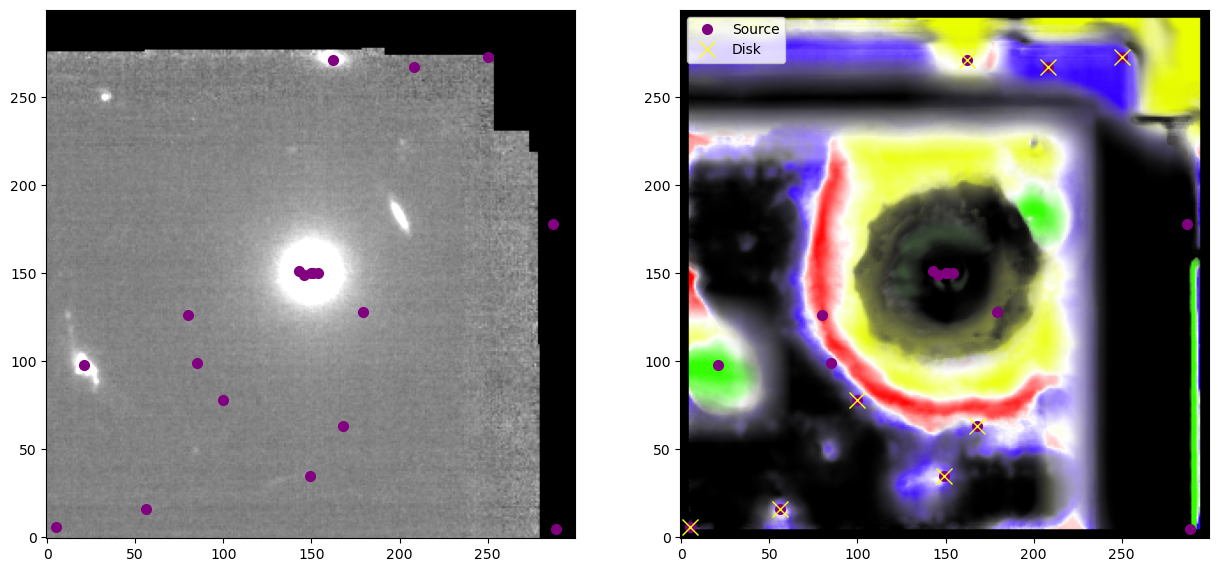

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(hcut, origin='lower', cmap='gray',  vmin=0, vmax=0.38)
axs[0].plot(datmor['x'], datmor['y'], 'o', ms=7, color='purple')
axs[1].imshow(rgb, origin='lower')
axs[1].plot(datmor['x'], datmor['y'], 'o', ms=7, color='purple', label='Source')
axs[1].plot(datmor_highdisk['x'], datmor_highdisk['y'], 'x', ms=12, color='yellow', label='Disk')
axs[1].legend()


Red = Spheroid <br>
Blue = Disk <br>
Green = Irregular <br>
Yellow = Point Source (compact) <br>
Black = Background <br>
White = Can't Classify (two class prob is so similar) <br>